# Validation numérique des résultats pour l'homogénéisation dans le cas aléatoire

In [26]:
%reload_ext autoreload
%autoreload 2

In [27]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import code_python as homogenization

L'implementation de a_per rescalé et a_eps est différente des autres notebooks

In [28]:
def a(size):
    return npr.randint(1,3,size)
def a_bis(size,M):
    return npr.randint(1,3,(size,M))

def f(x):
    return 1+x

[1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1]


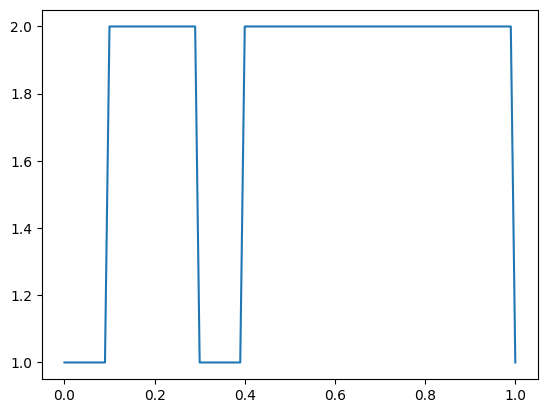

In [29]:
npr.seed(0)
number_of_periode = 10
number_of_discretization = 10
eps = 1/number_of_periode
h=eps/number_of_discretization
n = number_of_periode*number_of_discretization
X = np.linspace(0,1,n+1)
A_eps = np.repeat(a(number_of_periode),number_of_discretization)
A_eps = np.concatenate((A_eps, [A_eps[0]]))
print(A_eps)
plt.plot(X,A_eps)

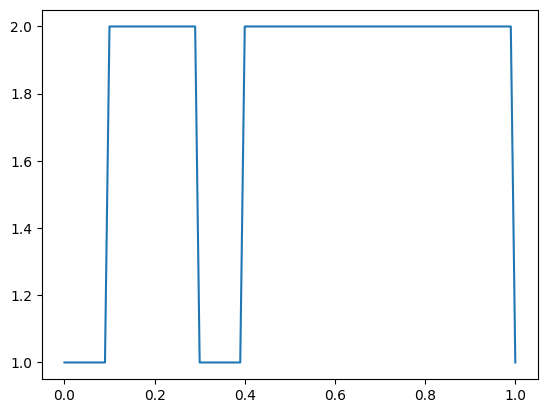

In [30]:
npr.seed(0)
number_of_periode = 10
number_of_discretization = 10
eps = 1/number_of_periode
h=eps/number_of_discretization
n = number_of_periode*number_of_discretization
X = np.linspace(0,1,n+1)
A_per_rescale = np.repeat(a(number_of_periode),number_of_discretization)
A_per_rescale = np.concatenate((A_per_rescale, [A_per_rescale[0]]))
plt.plot(X,A_per_rescale)

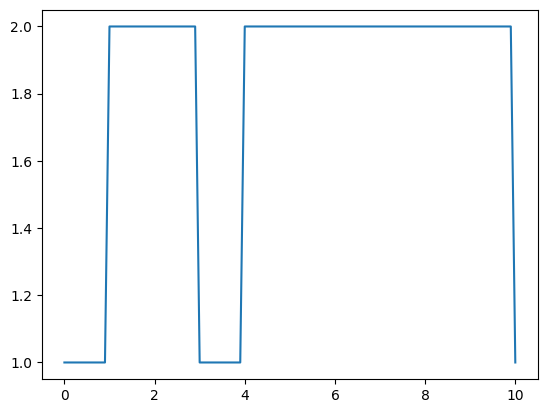

In [31]:
npr.seed(0)
number_of_periode = 10
number_of_discretization = 10
eps = 1/number_of_periode
h=eps/number_of_discretization
n = number_of_periode*number_of_discretization
Y = np.linspace(0,1,n+1)/eps
A_per = np.repeat(a(number_of_periode),number_of_discretization)
A_per = np.concatenate((A_per, [A_eps[0]]))
plt.plot(Y,A_per)

# Attention relation entre A_per et A_eps (A_per est rescalé) et pas de correcteur

$\partial_y a_{per}(\frac{x}{\epsilon}) = \frac{1}{\epsilon} \partial_x a_{per}(\frac{x}{\epsilon}) = \frac{1}{\epsilon} \frac{a_{per}(\frac{x+h}{\epsilon})+a_{per}(\frac{x-h}{\epsilon})}{2h/\epsilon} + O(h)
 $ 

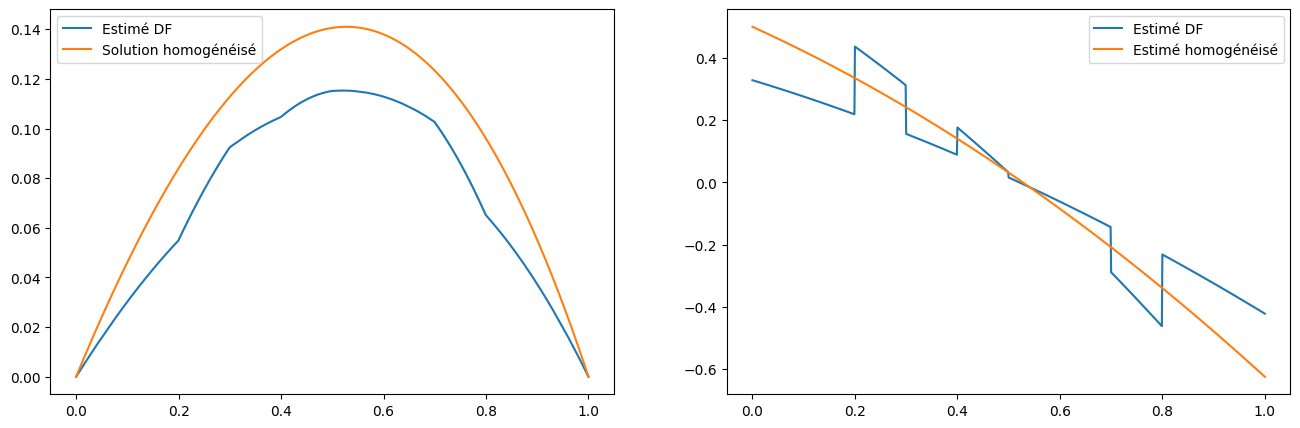

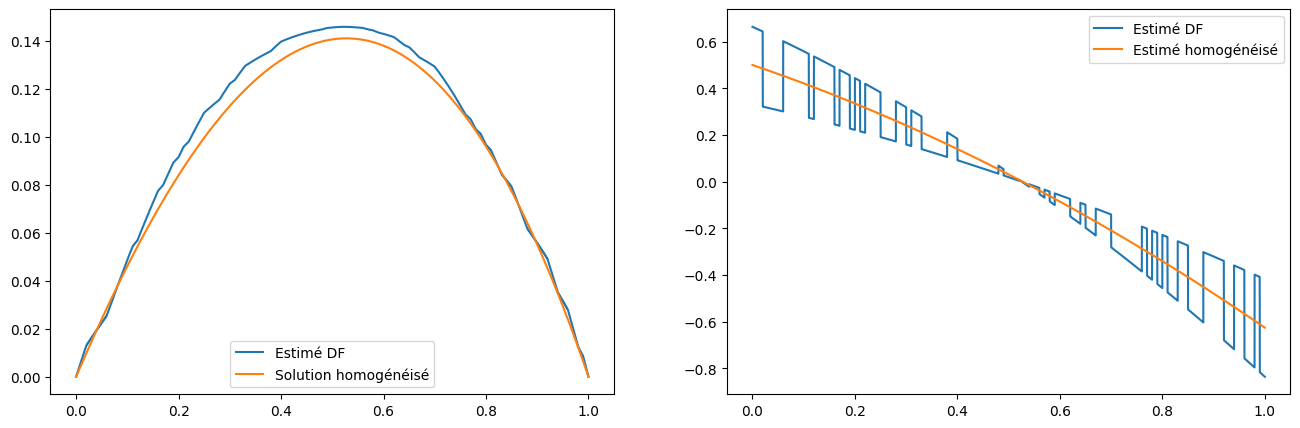

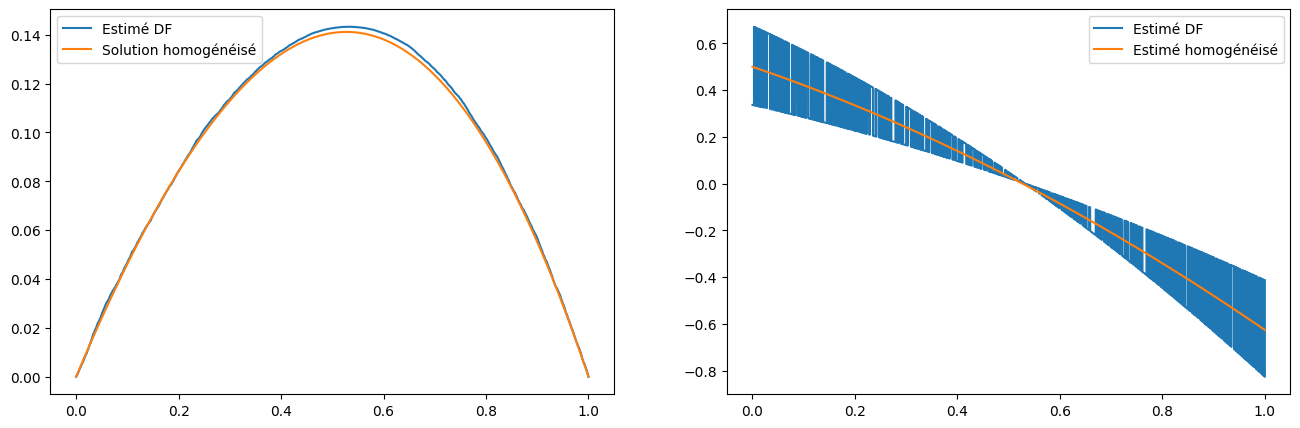

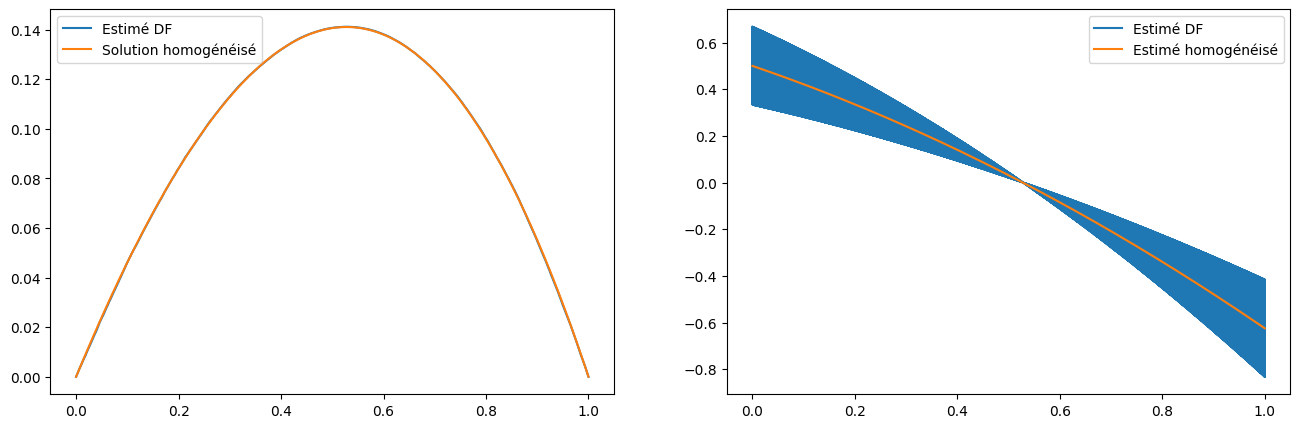

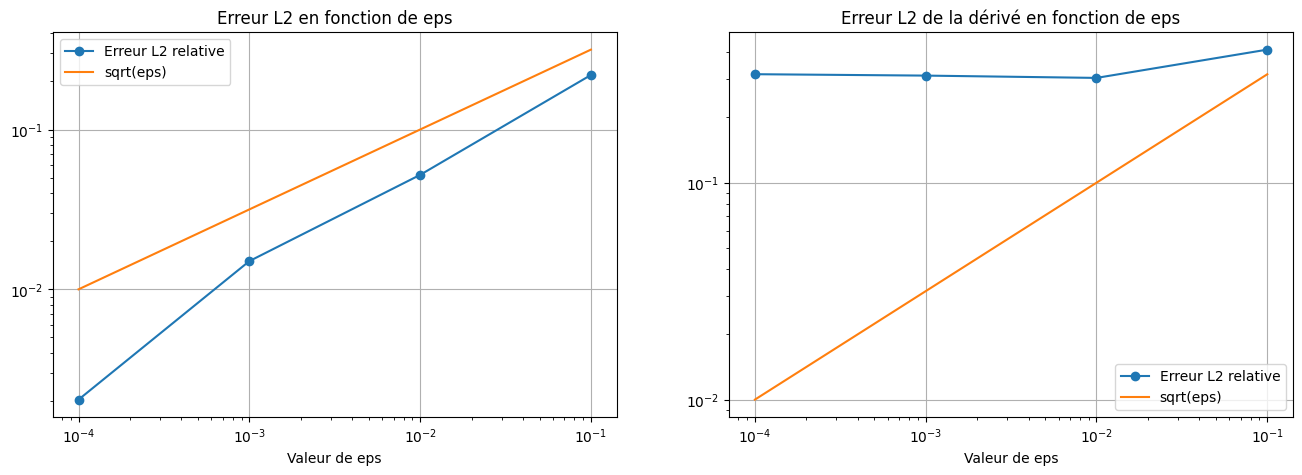

In [33]:
k_list = np.linspace(1,4,4,dtype=int)
number_of_periode_list = 10**k_list
eps_list = 1/number_of_periode_list

number_of_discretization = 100

error_list = []
error_list_p = []
h_value = []
for number_of_periode in number_of_periode_list:
    eps = 1/number_of_periode
    h=eps/number_of_discretization
    i = number_of_periode*number_of_discretization
    X = np.linspace(0,1,i+1)
    Y= X/eps
    npr.seed(number_of_periode)
    A_eps = np.repeat(a(number_of_periode),number_of_discretization)
    A_eps = np.concatenate((A_eps, [A_eps[0]]))
    A_per = A_eps

    h = abs(X[1]-X[0])
    F = f(X)

    #w = homogenization.DF_solve_corrector(i,h/eps,A_per)

    A_per = a_bis(1000,number_of_discretization)
    a_star = homogenization.compute_a_star_sto(A_per)
    U_homo = homogenization.DF_solve_laplacien(a_star,i,h,F)
    #U_homo = U_homo + eps * homogenization.compute_a_derive(U_homo,h)* w

    U_est = homogenization.DF_solve(i,h,F,A_eps)
    err = np.linalg.norm(U_homo - U_est)/np.linalg.norm(U_homo)
    error_list.append(err)
    h_value.append(h)

    fig = plt.figure(figsize=(16,5))
    ax = plt.subplot(1,2,1)
    ax.plot(X,U_est,label='Estimé DF')
    ax.plot(X,U_homo,label='Solution homogénéisé')
    ax.legend()

    Uprime = homogenization.compute_a_derive(U_est,h)
    Uprimeh = homogenization.compute_a_derive(U_homo,h)
    ax = plt.subplot(1,2,2)
    ax.plot(X,Uprime,label='Estimé DF')
    ax.plot(X,Uprimeh,label='Estimé homogénéisé')
    ax.legend()
    plt.show()
    error_list_p.append(np.linalg.norm(Uprime - Uprimeh)/np.linalg.norm(Uprime))
    

fig = plt.figure(figsize=(16,5))
ax = plt.subplot(1,2,1)
ax.loglog(eps_list, error_list, marker='o', label='Erreur L2 relative')
ax.loglog(eps_list, np.sqrt(eps_list), label='sqrt(eps)')
ax.legend()
plt.xlabel('Valeur de eps')
plt.title('Erreur L2 en fonction de eps')
plt.grid(True)

ax = plt.subplot(1,2,2)
ax.loglog(eps_list, error_list_p, marker='o', label='Erreur L2 relative')
ax.loglog(eps_list, np.sqrt(eps_list), label='sqrt(eps)')
ax.legend()
plt.xlabel('Valeur de eps')
plt.title('Erreur L2 de la dérivé en fonction de eps')
plt.grid(True)

plt.show()